# Daily Mix Playlist Exploratory Data Analysis (EDA)
### Ange Olson

I recently got back into analyzing my Spotify data and wanted to compare my listening habits to the general population’s. Additionally, while I could probably have a greater diversity in musical taste, I was curious to see how traits of the music I listened to varied across different segments of what I listen to. 

Every day, Spotify creates “Daily Mix” playlists for its listeners based on their music tastes, theoretically separated into similar segments. Additionally, Spotify creates a playlist for the public of the top 50 songs in the United States. For one day, I pulled the data for six Daily Mixes belonging to me and the top 50 songs down and got to work.

Below, I provide the results of EDA I performed on six Daily Mix playlists, as well at the US Top 50 playlist from the same time (April 24th, 2022).


## Data Prep

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("all_mixes.csv")
sns.set_theme(style="darkgrid", palette="Paired")

# clean  date 
from datetime import datetime

#def cleanDfDate(row):
  #date = row["release_date"]

  #date = date.strip()
  #if len(date) > 6: return datetime.strptime(date, '%Y-%m-%d')
  #return

#df["release_date"] = df.apply(cleanDfDate, axis=1)

def extractYear(row):
  date = row["release_date"]
  date = date[0:4]
  date = date.strip()
  if len(date) > 3: return datetime.strptime(date, '%Y').year
  
  return np.NaN

df["release_year"] = df.apply(extractYear, axis=1)

In [5]:
df['popDif'] = df['artist_pop'] - df['track_pop']
 # if positive, artist is more pop. than the given track
 # if neg, track more pop than artist typically is 

## Basic Plot

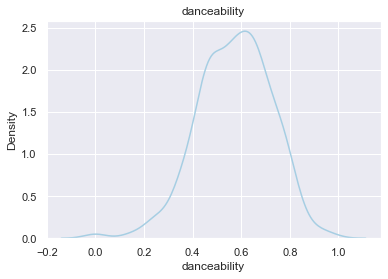

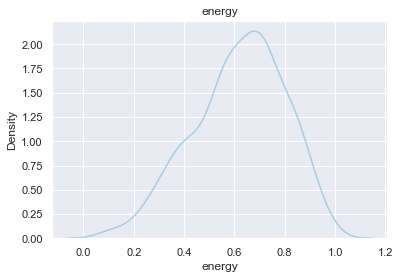

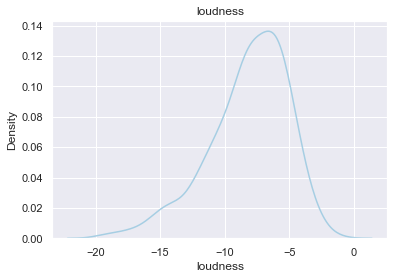

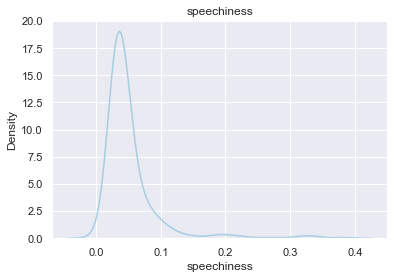

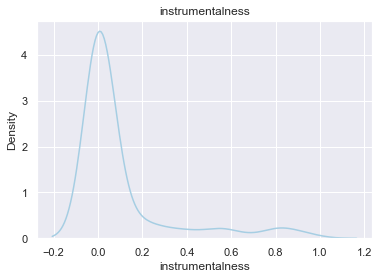

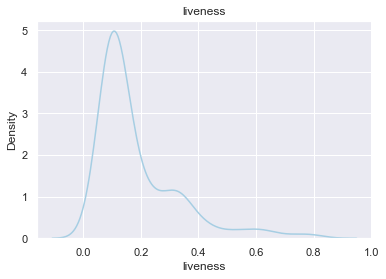

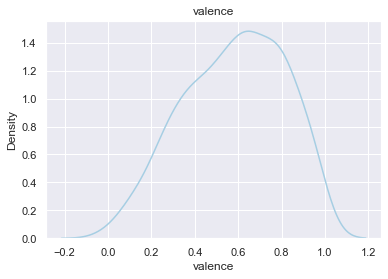

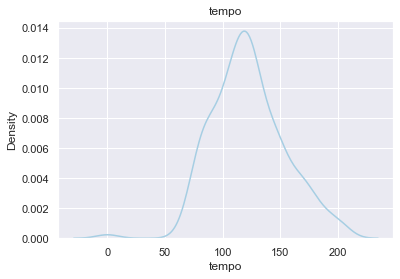

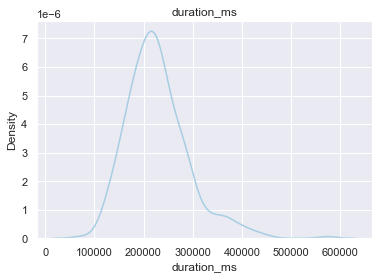

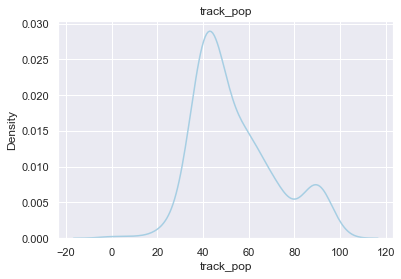

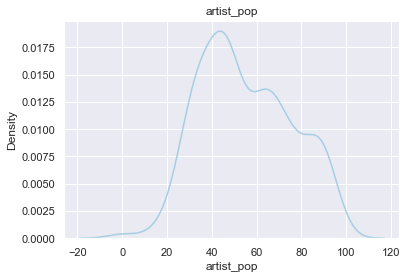

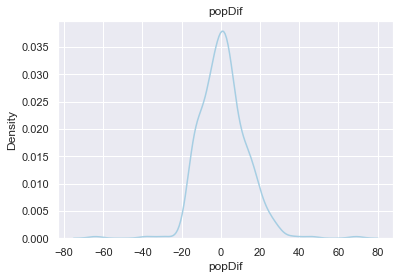

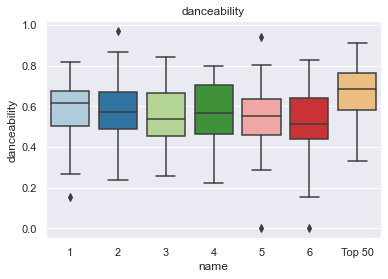

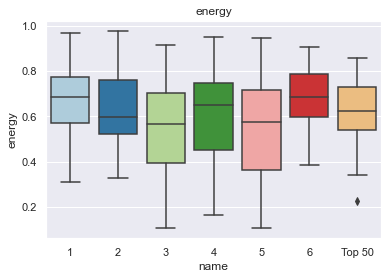

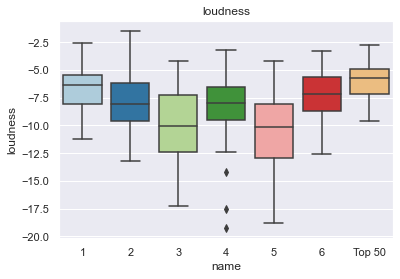

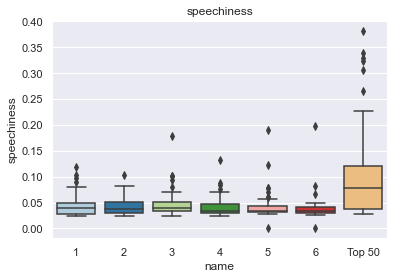

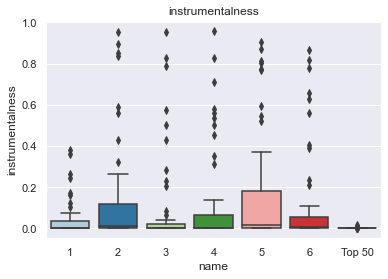

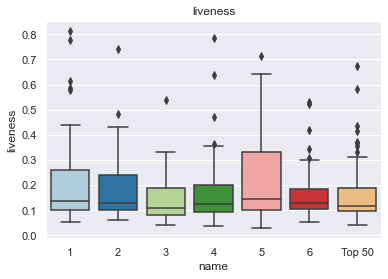

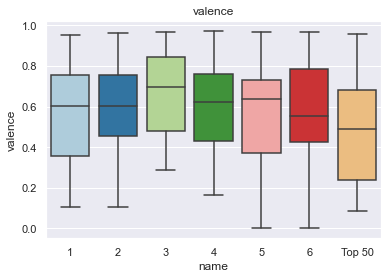

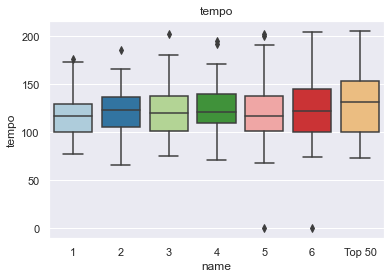

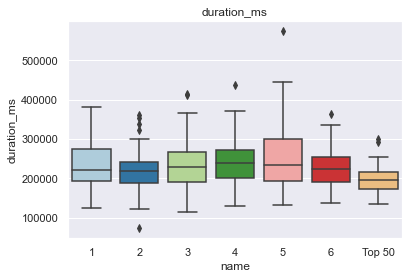

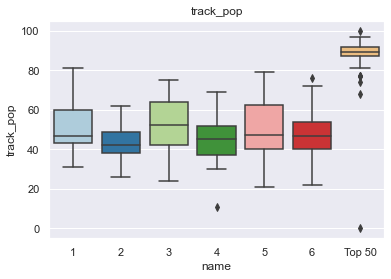

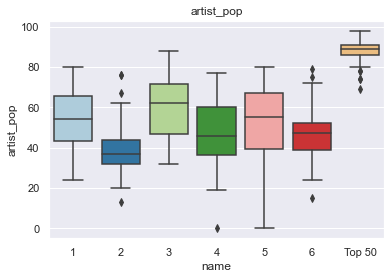

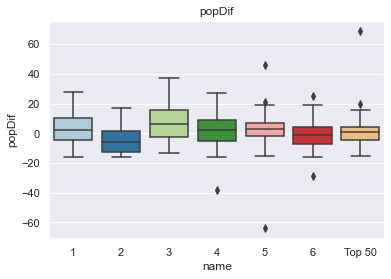

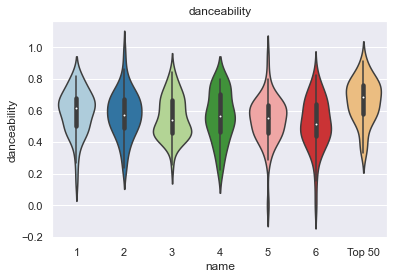

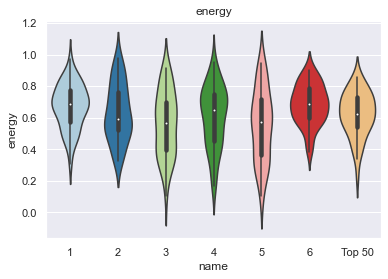

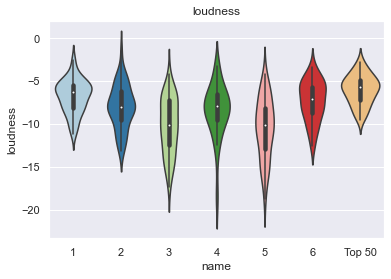

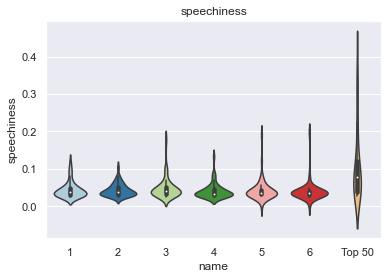

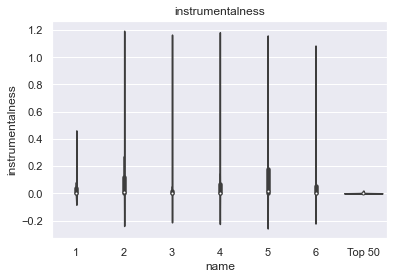

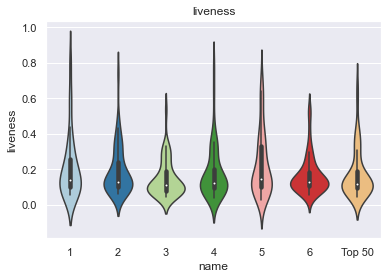

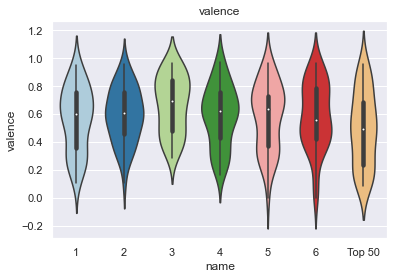

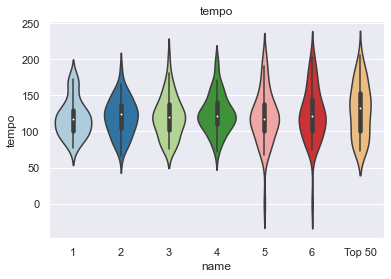

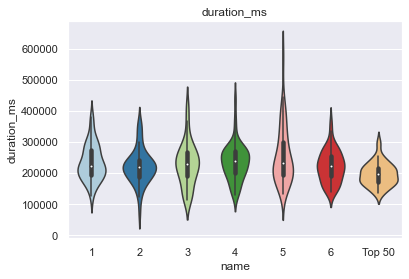

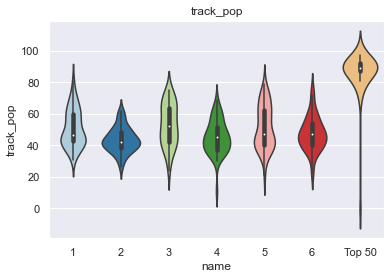

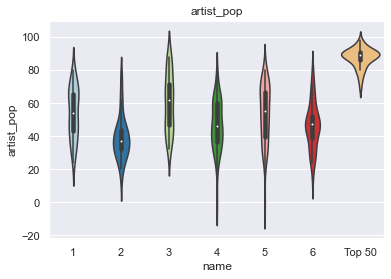

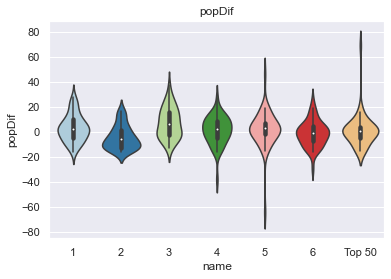

In [6]:
list = ('danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'track_pop', 'artist_pop', 'popDif')
for var in list:
    sns.kdeplot(data = df, x= var).set(title = var)
    plt.show()

for var in list:
    ax = sns.boxplot(x='name',y=var, data=df)
    ax.set(title = var)
    ax.set_xticklabels(["1", "2", "3", "4", "5", "6", "Top 50"])
    plt.show()

for var in list:
    ax = sns.violinplot(x='name',y=var, data=df)
    ax.set(title = var)
    ax.set_xticklabels(["1", "2", "3", "4", "5", "6", "Top 50"])
    plt.show()

## Scatterplots

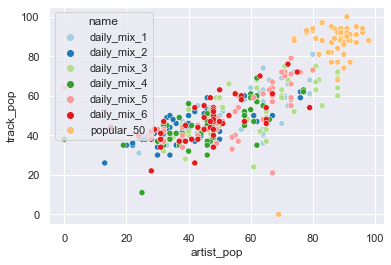

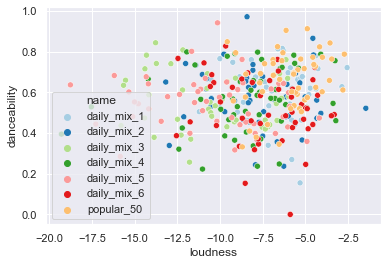

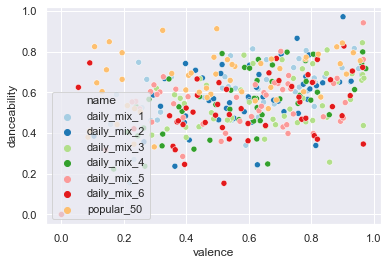

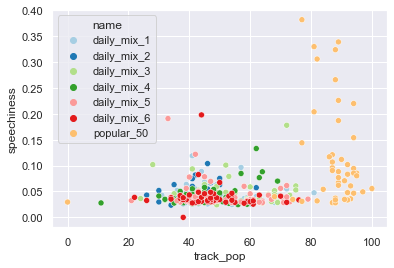

In [7]:
sns.scatterplot(x='artist_pop',y='track_pop', hue = 'name', alpha = 1, data=df)
plt.show()

sns.scatterplot(x='loudness',y='danceability', hue = 'name', alpha = 1, data=df)
plt.show()


sns.scatterplot(x='valence',y='danceability', hue = 'name', alpha = 1, data=df)
plt.show()

sns.scatterplot(x='track_pop',y='speechiness', hue = 'name', alpha = 1, data=df)
plt.show()

## Correlation

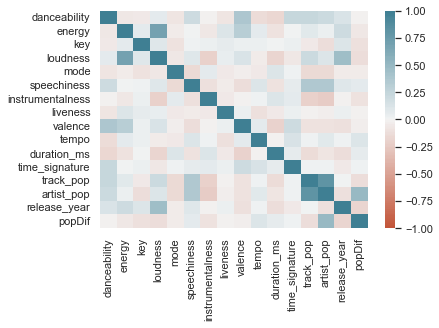

In [12]:
matrix = df.corr().round(2)
ax = sns.heatmap(
    matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=False, annot=False
)

## Release Year Analysis

<AxesSubplot:xlabel='release_year', ylabel='danceability'>

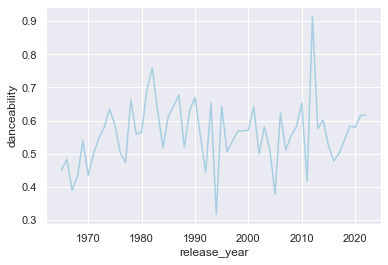

In [9]:
table = pd.pivot_table(df, index = 'release_year')
sns.lineplot(data=table, x="release_year", y="danceability")

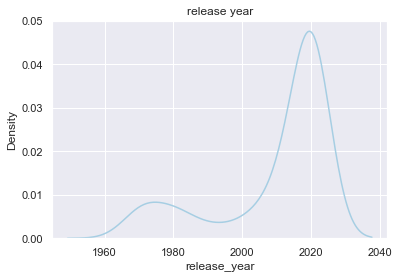

In [10]:
sns.kdeplot(data = df, x= 'release_year').set(title = "release year")
plt.show()

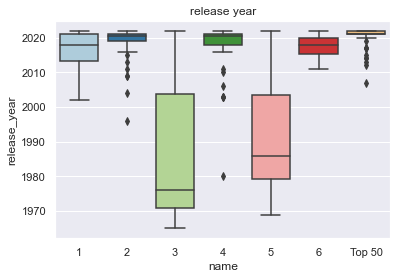

In [11]:
ax = sns.boxplot(x='name',y='release_year', data=df)
ax.set(title = "release year")
ax.set_xticklabels(["1", "2", "3", "4", "5", "6", "Top 50"])
plt.show()